# UAS PENGENALAN DATA SCIENCE

Nama : Eunike Tirza Kerenhapukh
NRP  : 1973021

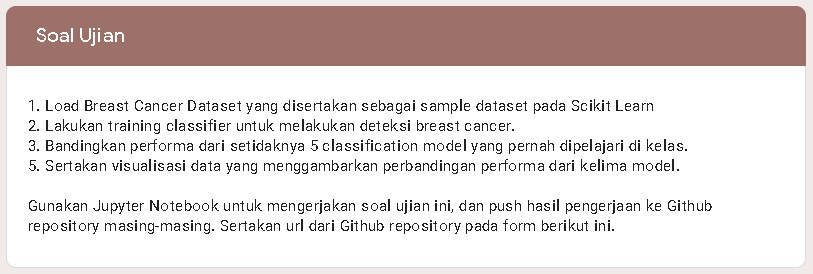

## Dataset: Breast Cancer Wisconsin (Diagnostic)

### Load Dataset 

In [1]:
from sklearn.datasets import load_breast_cancer

print(load_breast_cancer().DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [2]:
X, y = load_breast_cancer(return_X_y=True)
print(f'X.shape: {X.shape}')

X.shape: (569, 30)


### Training & Testing Set

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test,y_train,  y_test = train_test_split(X,
                                                   y,
                                                   test_size = 0.2,
                                                   random_state=0)
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape:{X_test.shape}')

X_train shape: (455, 30)
X_test shape:(114, 30)


## Naive Bayes  Classification  

In [4]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

model = GaussianNB()
model.fit(X_train,y_train)
print(f'Model Score : {model.score(X_test, y_test)}')

Model Score : 0.9298245614035088


### Evaluasi Model Naive Bayes

In [5]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        47
           1       0.94      0.94      0.94        67

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



## Classification dengan SVC (Support Vector Classifier)

In [6]:
from sklearn.svm import SVC

model = SVC(random_state=0)
model.fit(X_train, y_train)

SVC(random_state=0)

### Evaluasi Model SVC

In [7]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.85      0.91        47
           1       0.90      0.99      0.94        67

    accuracy                           0.93       114
   macro avg       0.94      0.92      0.93       114
weighted avg       0.93      0.93      0.93       114



## Hyperparameter Tuning dengan GridSearchCV

In [21]:
from sklearn.model_selection import GridSearchCV

parameters = {'kernel':['rbf','poly','sigmoid'],
        'C':[0.5,1,10,100],
        'gamma':['scale',1,0.1,0.01,0.001]}

grid_search = GridSearchCV(estimator=SVC(random_state=0),
                          param_grid=parameters,
                          n_jobs=6,
                          verbose=1,
                          scoring='accuracy')

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(estimator=SVC(random_state=0), n_jobs=6,
             param_grid={'C': [0.5, 1, 10, 100],
                         'gamma': ['scale', 1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             scoring='accuracy', verbose=1)

In [22]:
print(f'Best Score:{grid_search.best_score_}')

best_params = grid_search.best_estimator_.get_params()
print(f'Best Parameters:')
for param in parameters:
    print(f'\t{param}:{best_params[param]}')

Best Score:0.9802197802197803
Best Parameters:
	kernel:rbf
	C:10
	gamma:0.01


## Predict & Evaluate

In [23]:
y_pred = grid_search.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        47
           1       0.99      0.99      0.99        67

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



## Decision Tree Classification

In [8]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=5)

model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

### Visualisasi Model Decision Tree

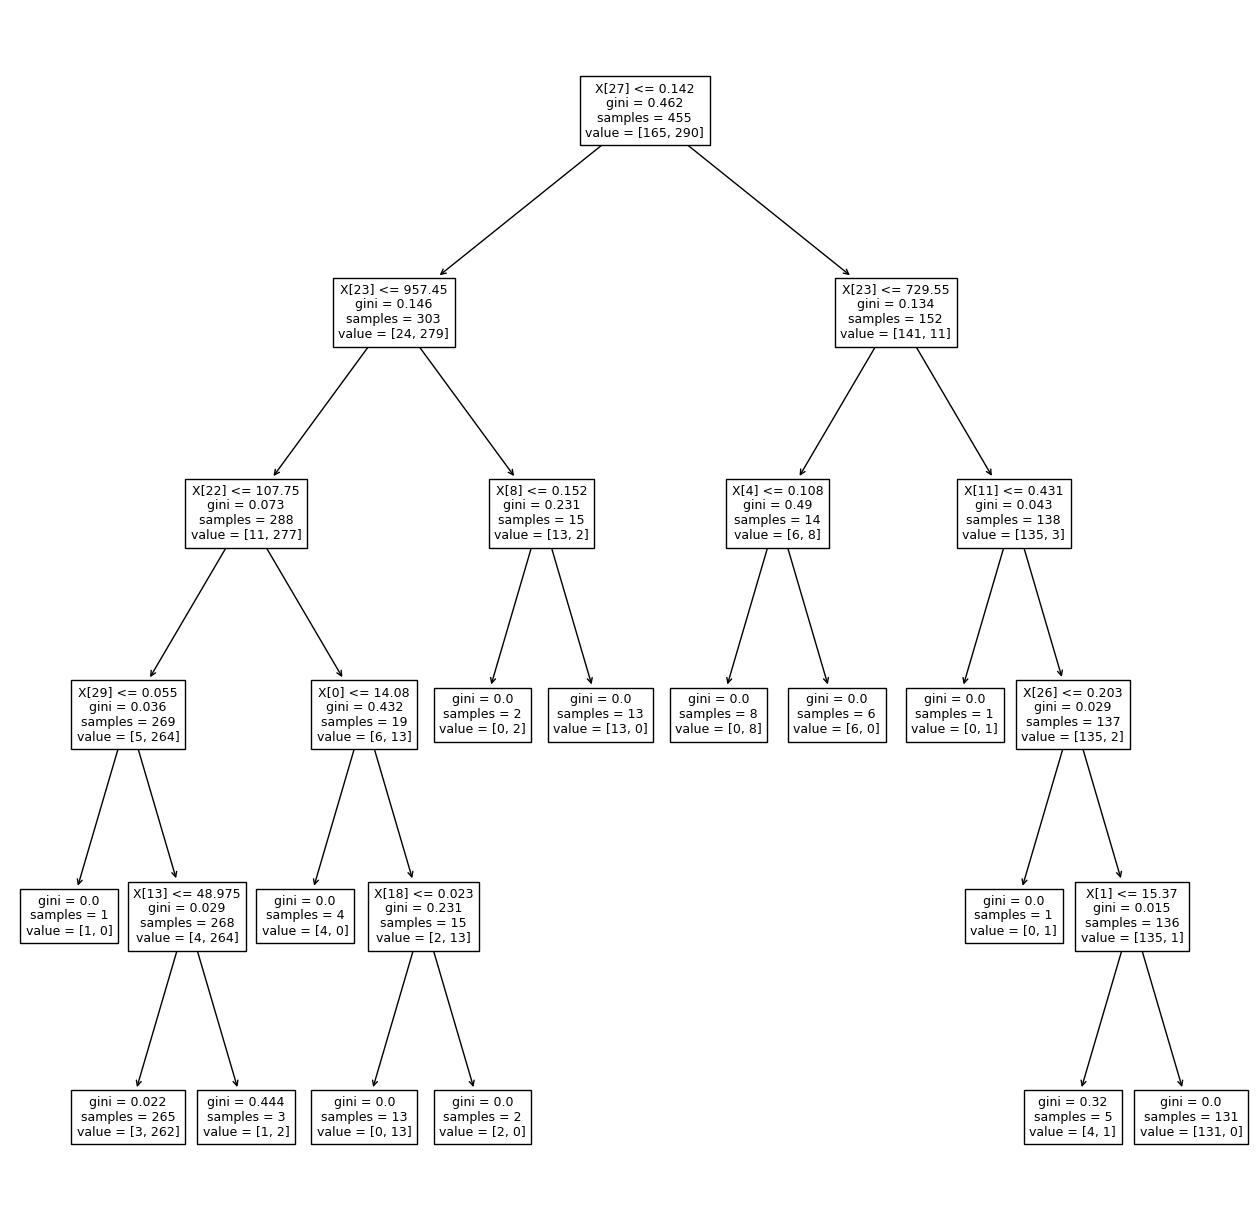

In [9]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.rcParams['figure.dpi'] = 100
plt.subplots(figsize=(16,16))
tree.plot_tree(model,fontsize=9)
plt.show()

### Evaluasi Model Decision Tree

In [10]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94        47
           1       0.97      0.94      0.95        67

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.95       114
weighted avg       0.95      0.95      0.95       114



## Random Forest Classification

In [11]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100,
                              random_state=0)

model.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

### Evaluasi Model Random Forest

In [12]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)

print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96        49
           1       0.96      0.98      0.97        65

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



## Classification dengan KNN

### Preprocessing Dataset

In [13]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
print(f'y_train:\n{y_train}')

y_train:
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 

In [14]:
y_train = y_train.flatten()
print(f'y_train:{y_train}')

y_train:[1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 0 1 1 1
 1 1 1 1 0 1 0 1 0 0 1 1 0 1 0 0 0 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 0 1 1 1 1
 0 1 1 0 0 1 1 0 0 1 1 0 1 1 0 0 0 1 1 1 0 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1 1
 1 1 0 1 0 1 1 1 0 1 1 1 0 1 1 0 0 1 0 1 0 1 0 0 0 0 1 0 1 0 1 0 1 0 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 0 0 1 0 0 1
 1 0 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 1 1 0
 0 0 0 1 0 1 0 0 1 1 1 1 1 0 1 1 0 1 1 0 0 1 1 1 0 0 1 1 0 1 1 1 0 1 0 1 0
 0 0 0 1 1 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 0 0 0 0 1 1 0 1 1 1 0 0 1 1 1 1 1
 0 0 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 0 1 0 0 1 1 1 1 1 0 0 0 1 1 0
 0 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0
 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 0 0 1 0 1 1 0
 0 0 0 1 0 0 0 1 0 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 0 1 1 1 0 0 1 1 1 0 1 1 0
 1 1 1 1 1 0 0 0 1 1 1]


In [15]:
from sklearn.preprocessing import StandardScaler

model = StandardScaler()
model.fit(X_train)
X_train = model.transform(X_train)
X_test= model.transform(X_test)

### Training KNN Classification Model

In [16]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

### Evaluasi Model KNN

In [17]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)

print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        42
           1       1.00      0.93      0.96        72

    accuracy                           0.96       114
   macro avg       0.95      0.97      0.95       114
weighted avg       0.96      0.96      0.96       114



## Visualisasi Data

Pada tahap ini saya akan memvisualisasikan perbandingan performa dari kelima model di atas.

In [18]:
%matplotlib inline

In [19]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

naive = [0.93, 0.93, 0.93]
svc = [0.94, 0.92, 0.93]
decision_tree = [0.95, 0.95, 0.95]
random_forest = [0.97, 0.96, 0.96]
knn = [0.95, 0.97, 0.95]
kategori = ['precision', 'recall', 'f1-score']

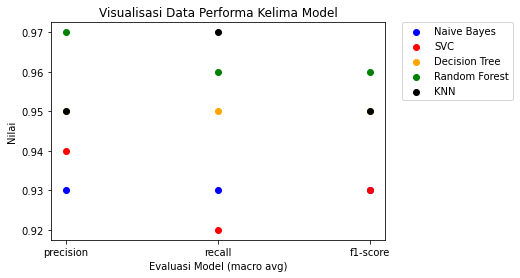

In [20]:
plt.scatter(kategori, naive,linestyle='solid',color='blue',label='Naive Bayes')
plt.scatter(kategori, svc,linestyle='solid',color='red',label='SVC')
plt.scatter(kategori, decision_tree,linestyle='solid',color='orange',label='Decision Tree')
plt.scatter(kategori, random_forest,linestyle='solid',color='green',label='Random Forest')
plt.scatter(kategori, knn,linestyle='solid',color='black', label='KNN')

plt.xlabel('Evaluasi Model (macro avg)')
plt.ylabel('Nilai')
plt.title('Visualisasi Data Performa Kelima Model')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.show()

Dapat dilihat bahwa model Random Forest memiliki performa yang paling tinggi pada kategori 'precision' dan 'f1-score', kemudian pada kategori 'recall' menempati posisi kedua. Jadi dapat disimpulkan bahwa perfoma model yang baik adalah Random Forest. 